# 직업별

## 데이터 로드 및 세팅


In [83]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [84]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

# 파일 경로 설정
file_path_1 = './sample_data/question.csv'
file_path_2 = './sample_data/value.csv'
file_path_3 = './sample_data/raw_data.csv'

# CSV 파일 읽기 (CP949 인코딩)
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df3 = pd.read_csv(file_path_3, encoding='utf-8')

# 데이터프레임 출력
print("1. 일반국민_파일설계서.csv 데이터프레임:")
print(df1.head())
print("\n1. 일반국민_파일설계서_변수값.csv 데이터프레임:")
print(df2.head())
print("\n1 일반국민_raw data.csv 데이터프레임:")
print(df3.head())




1. 일반국민_파일설계서.csv 데이터프레임:
  변수 정보 Unnamed: 1                    Unnamed: 2 Unnamed: 3 Unnamed: 4  \
0    변수         위치                           레이블       열 너비         맞춤   
1    ID          1                            ID          8     오른쪽 맞춤   
2   TYP          2                        설문지 유형          5     오른쪽 맞춤   
3  Q1A1          3  문1. 필요시 이용 가능한 PC 보유율_1)데스크탑          6     오른쪽 맞춤   
4  Q1A2          4   문1. 필요시 이용 가능한 PC 보유율_2)노트북          6     오른쪽 맞춤   

  Unnamed: 5 Unnamed: 6  Unnamed: 7  
0      인쇄 형식      쓰기 형식         NaN  
1         F6         F6         NaN  
2         F1         F1         NaN  
3         F1         F1         NaN  
4         F1         F1         NaN  

1. 일반국민_파일설계서_변수값.csv 데이터프레임:
   변수값  Unnamed: 1 Unnamed: 2  Unnamed: 3
0    값         NaN        레이블         NaN
1  TYP         1.0         일반         NaN
2  NaN         2.0        농어민         NaN
3  NaN         3.0        장애인         NaN
4  NaN         4.0        저소득         NaN

1 일반국민_raw data.c

In [85]:
df3['ADQ3']

0       11
1       11
2       14
3        5
4        8
        ..
6995    12
6996    13
6997    12
6998    15
6999    12
Name: ADQ3, Length: 7000, dtype: int64

In [86]:
# 필요한 열 선택
df_selected = df3[['ADQ3',
                   'ADQ9',
                   'Q29A01', 'Q29A02', 'Q29A03','Q29A04','Q29A05','Q29A06','Q29A07','Q29A08','Q29A09','Q29A10','Q29A11','Q29A12',
                   'Q21',
                   'Q23A1', 'Q23A2', 'Q23A3', 'Q23A4', 'Q23A5', 'Q23A6', 'Q23A7', 'Q23A8']]

# 결측치 확인
missing_values = df_selected.isnull().sum()

# 결측치 처리 (결측치가 있는 행 제거)
df_selected_cleaned = df_selected.dropna()

# 데이터프레임 출력
df_selected_head = df_selected_cleaned.head()

missing_values, df_selected_head

(ADQ3      0
 ADQ9      0
 Q29A01    0
 Q29A02    0
 Q29A03    0
 Q29A04    0
 Q29A05    0
 Q29A06    0
 Q29A07    0
 Q29A08    0
 Q29A09    0
 Q29A10    0
 Q29A11    0
 Q29A12    0
 Q21       0
 Q23A1     0
 Q23A2     0
 Q23A3     0
 Q23A4     0
 Q23A5     0
 Q23A6     0
 Q23A7     0
 Q23A8     0
 dtype: int64,
    ADQ3  ADQ9  Q29A01  Q29A02  Q29A03  Q29A04  Q29A05  Q29A06  Q29A07  Q29A08  \
 0    11     2       1       1       1       1       1       1       1       1   
 1    11     4       5       5       5       4       4       4       3       3   
 2    14     2       3       3       3       2       2       3       2       2   
 3     5     3       4       5       2       4       4       3       4       1   
 4     8     2       5       5       5       5       4       3       3       3   
 
    ...  Q29A12  Q21  Q23A1  Q23A2  Q23A3 Q23A4 Q23A5 Q23A6 Q23A7 Q23A8  
 0  ...       1    2                                                     
 1  ...       5    1                        

ADQ3(직업), Q21(인공지능 사용 여부), Q23(사용하지 않는 이유), Q29(디지털 역량)

## 직업별 디지털 역량 합산 순위

In [87]:
df_selected_cleaned['ADQ3'].value_counts()

ADQ3
3     1243
4     1106
11     930
5      871
12     768
7      388
13     387
14     350
9      244
6      241
2      192
8      139
1       93
15      42
10       6
Name: count, dtype: int64

In [88]:
# ADQ3의 숫자를 값으로 매핑
df_selected_cleaned['ADQ3'] = df_selected_cleaned['ADQ3'].map({
    1: '관리자',
    2: '전문가 및 관련 종사자',
    3: '사무 종사자',
    4: '서비스 종사자',
    5: '판매 종사자',
    6: '농립어업 숙련 종사자',
    7: '기능원 및 관련 기능 종사자',
    8: '장치/기계조작 및 조립 종사자',
    9: '단순노무 종사자',
    10: '군인',
    11: '전업주부',
    12: '초/중/고등학생',
    13: '대학생',
    14: '무직',
    15: '기타'
})

# 결과 확인
df_selected_cleaned['ADQ3'].value_counts()

ADQ3
사무 종사자              1243
서비스 종사자             1106
전업주부                 930
판매 종사자               871
초/중/고등학생             768
기능원 및 관련 기능 종사자      388
대학생                  387
무직                   350
단순노무 종사자             244
농립어업 숙련 종사자          241
전문가 및 관련 종사자         192
장치/기계조작 및 조립 종사자     139
관리자                   93
기타                    42
군인                     6
Name: count, dtype: int64

In [89]:
# 디지털 역량 지표 합산
df_selected_cleaned['digital_skill'] = df_selected_cleaned[['Q29A01', 'Q29A02', 'Q29A03', 'Q29A04', 'Q29A05', 'Q29A06', 'Q29A07', 'Q29A08', 'Q29A09', 'Q29A10', 'Q29A11', 'Q29A12']].sum(axis=1)

# 직업으로 그룹화하여 디지털 역량과 인공지능 사용여부의 평균 계산
grouped = df_selected_cleaned.groupby('ADQ3').agg({'digital_skill': 'mean', 'Q21': 'mean'}).reset_index()

# 결과 출력
grouped

,ADQ3,digital_skill,Q21
0,관리자,44.021505,1.344086
1,군인,47.666667,1.333333
2,기능원 및 관련 기능 종사자,39.824742,1.561856
3,기타,35.619048,1.666667
4,농립어업 숙련 종사자,25.116183,1.767635
5,단순노무 종사자,27.639344,1.750000
6,대학생,49.656331,1.240310
7,무직,26.182857,1.742857
8,사무 종사자,47.465004,1.292840
9,서비스 종사자,39.781193,1.463834


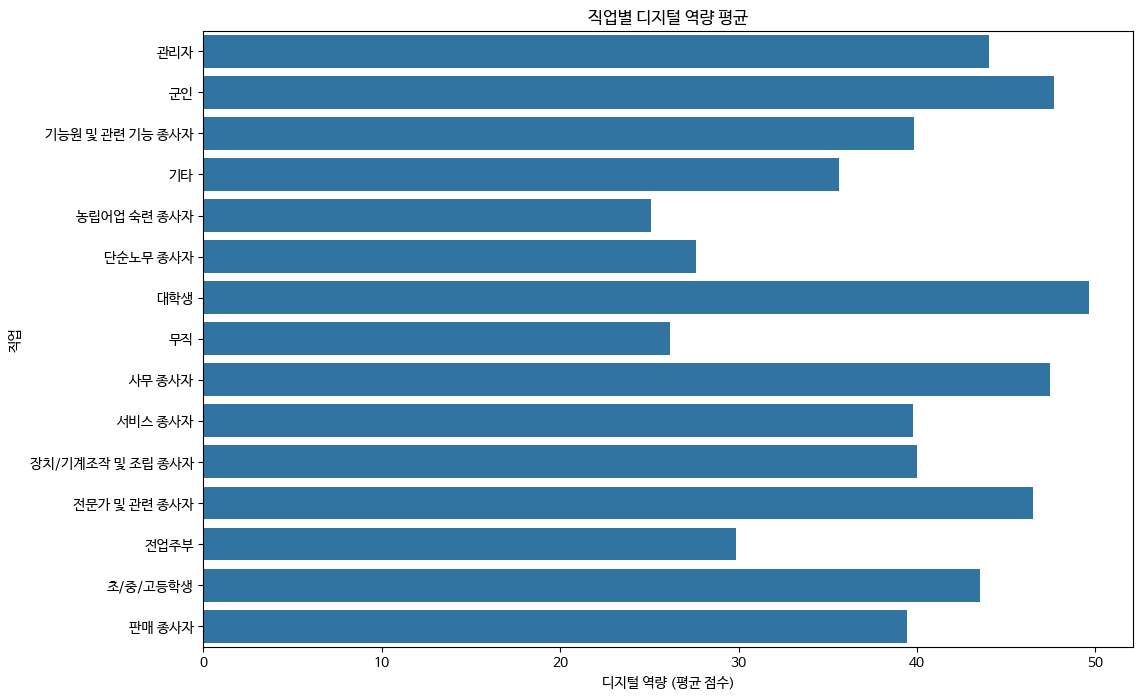

In [90]:
# 직업별 디지털 역량 평균 계산
grouped = df_selected_cleaned.groupby('ADQ3').agg({'digital_skill': 'mean'}).reset_index()

# 히스토그램 그리기 (바 차트)
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped, x='digital_skill', y='ADQ3')
plt.title('직업별 디지털 역량 평균')
plt.xlabel('디지털 역량 (평균 점수)')
plt.ylabel('직업')
plt.show()

=> 대학생, 군인, 사무종사자, 전문가 및 관련 종사자, 관리자, 초/중/고등학생 <br>
수업을 통해 쉽게 디지털을 접하는 학생들 <br>
근무 환경에서 디지털을 접하는 사무종사자, 전문가 및 관련 종사자, 군인 <br>

두 그룹으로 특징을 분류할 수 있음


## 직업별 인공지능 사용 여부

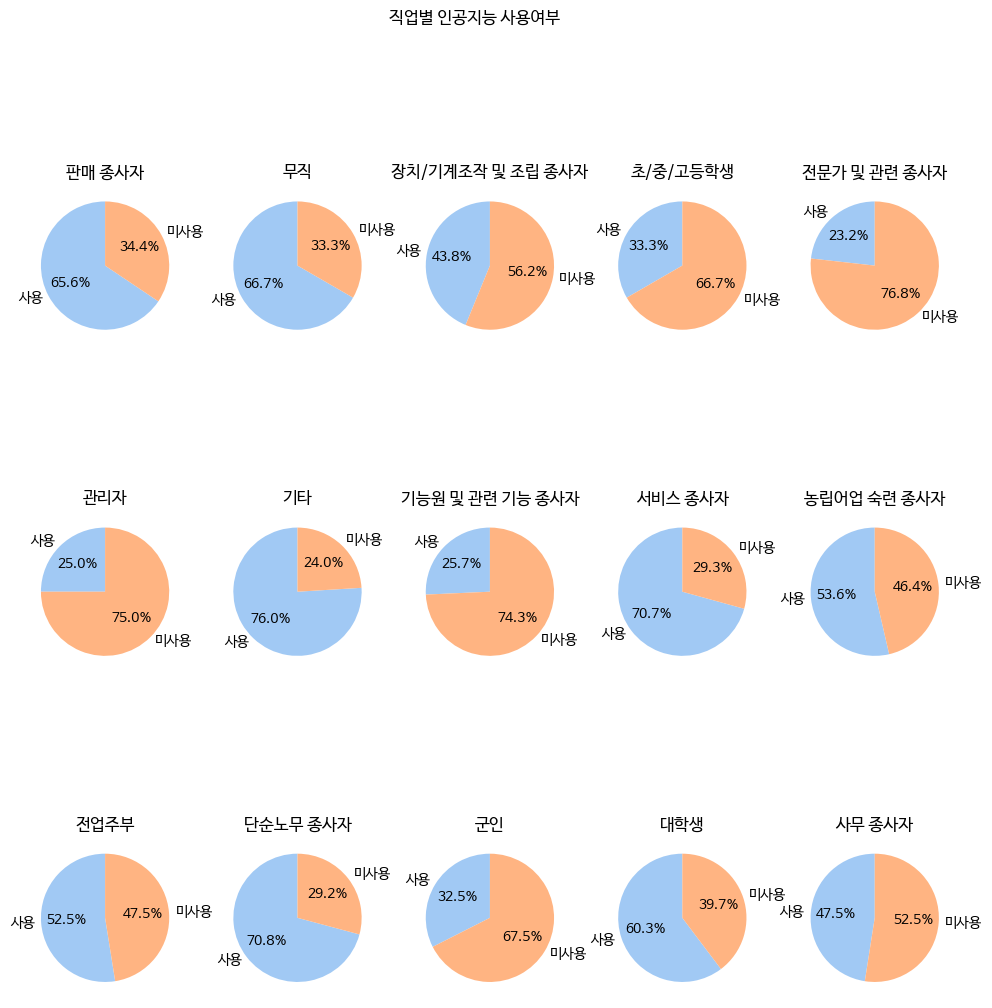

In [91]:
# 직업별 인공지능 사용여부 비율 계산
ai_use = df_selected_cleaned.groupby(['ADQ3', 'Q21']).size().unstack(fill_value=0)

fig, axs = plt.subplots(3, 5, figsize=(12, 12))

# 직업별 데이터 준비
types = ai_use.index
titles = list(set(df_selected_cleaned['ADQ3']))
colors = sns.color_palette('pastel')[0:2]

for i, ax in enumerate(axs.flatten()):
    if i < len(types):
        data = ai_use.loc[types[i]]
        ax.pie(data, labels=['사용', '미사용'], autopct='%1.1f%%', colors=colors, startangle=90)
        ax.set_title(titles[i])

plt.suptitle('직업별 인공지능 사용여부')
plt.show()

- 사용함 <br>
판매 종사자, 무직, 서비스 종사자, 농립어업 숙련 종사자, 전업주부, 단순노무 종사자, 대학생
- 사용안함 <br>
장치/기계조작 및 조립 종사자, 초/중/고등학생, 전문가 및 관련 종사자, 관리자, 기능원 및 관련 기능 종사자, 군인, 사무 종사자


디지털 역량이 높다고 평가된 군인, 사무종사자, 전문가 및 관련 종사자, 관리자, 초/중/고등학생의 경우 디지털 역량은 높지만 그에 비해 인공지능 사용비율이 낮은 것을 확인할 수 있음

## 인공지능을 사용하지 않는다고 설문한 각 직업별 사용하지 않는 이유

In [92]:
# 인공지능을 사용하지 않는 사람들 필터링
df_no_ai_use = df_selected_cleaned[df_selected_cleaned['Q21'] == 2]  # Q21이 2이면 인공지능을 사용하지 않는 것

df_no_ai_use['ADQ3'].value_counts()

ADQ3
전업주부                628
서비스 종사자             513
판매 종사자              457
사무 종사자              364
초/중/고등학생            305
무직                  260
기능원 및 관련 기능 종사자     218
농립어업 숙련 종사자         185
단순노무 종사자            183
대학생                  93
장치/기계조작 및 조립 종사자     66
전문가 및 관련 종사자         56
관리자                  32
기타                   28
군인                    2
Name: count, dtype: int64

In [93]:
# 사용하지 않는 이유에 대한 각 열의 빈도수 확인
reasons = [ 'Q23A1', 'Q23A2', 'Q23A3', 'Q23A4', 'Q23A5', 'Q23A6', 'Q23A7', 'Q23A8']

# 가구형태별 상위 5개 이유 추출 함수
def get_top_reasons(df, reasons, top_n=6):
    reason_counts = df[reasons].apply(pd.Series.value_counts).fillna(0).sum(axis=1)
    top_reasons = reason_counts.sort_values(ascending=False).head(top_n)
    return top_reasons

# 가구형태별 상위 5개 이유 추출
grouped_reasons = df_no_ai_use.groupby('ADQ3').apply(lambda x: get_top_reasons(x, reasons)).reset_index()
grouped_reasons = grouped_reasons.rename(columns={'level_1': 'reason', 0: 'count'})

# 결과 확인
grouped_reasons

,ADQ3,reason,count
0,관리자,,195.0
1,관리자,2,15.0
2,관리자,4,14.0
3,관리자,1,12.0
4,관리자,3,9.0
...,...,...,...
82,판매 종사자,4,227.0
83,판매 종사자,2,126.0
84,판매 종사자,3,126.0
85,판매 종사자,5,124.0


In [94]:
# 가구형태별 상위 5개 이유 추출 후 총합값(drop)
grouped_reasons = df_no_ai_use.groupby('ADQ3').apply(lambda x: get_top_reasons(x, reasons)).reset_index()
grouped_reasons = grouped_reasons.rename(columns={'level_1': 'reason', 0: 'count'})

# 총합 제거
grouped_reasons = grouped_reasons[grouped_reasons['reason'].str.strip() != ""]

# 결과 확인
grouped_reasons.head(20)

,ADQ3,reason,count
1,관리자,2,15.0
2,관리자,4,14.0
3,관리자,1,12.0
4,관리자,3,9.0
5,관리자,5,7.0
7,군인,4,1.0
8,군인,5,1.0
10,기능원 및 관련 기능 종사자,4,99.0
11,기능원 및 관련 기능 종사자,3,63.0
12,기능원 및 관련 기능 종사자,5,59.0


In [95]:
# 이유에 대한 설명을 추가
reason_labels = {
    '1': '가격/요금이 비싸서',
    '2': '아직 AI에 대해 잘 몰라서',
    '3': '이용할 기기/제품이 없어서',
    '4': '이용할 필요성이 없어서',
    '5': '이용방법이 어려워서',
    '6': '기술에 대한 거부감이 없어서',
    '7': '신체적 제약으로 이용이 어려워서',
    '8': '기타'
}

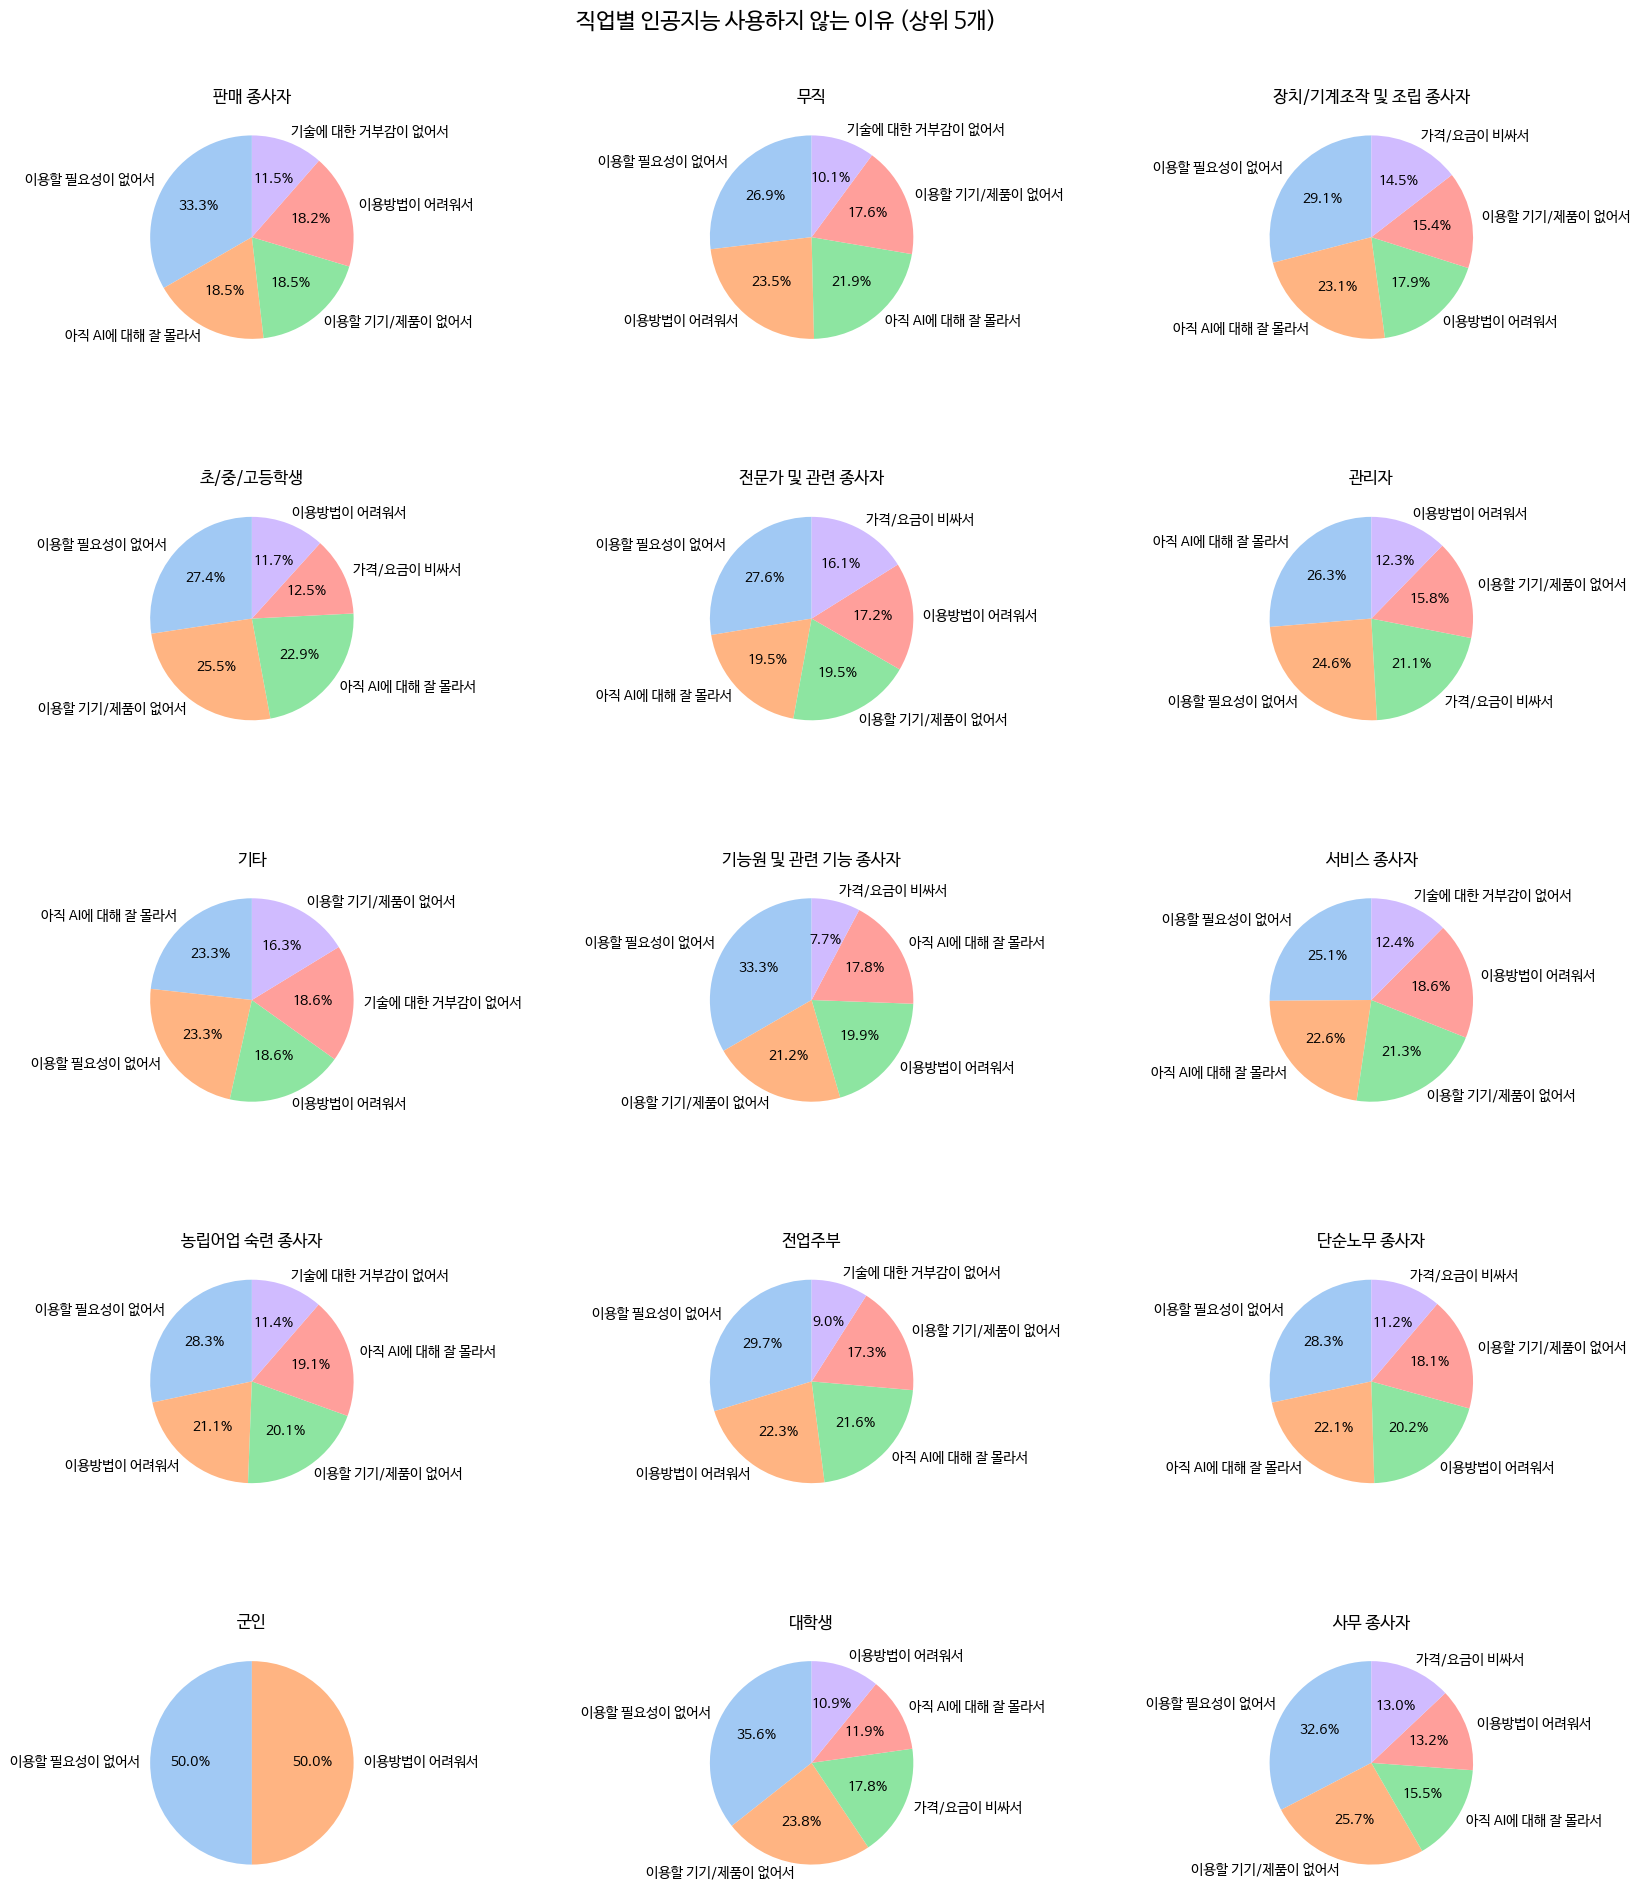

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
fig, axs = plt.subplots(5, 3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)
titles = list(set(df_selected_cleaned['ADQ3']))
colors = sns.color_palette('pastel')

for i, ax in enumerate(axs.flatten()):
    if i < len(titles):
        title = titles[i]
        reason_data = grouped_reasons[grouped_reasons['ADQ3'] == title]
        reason_labels_mapped = [reason_labels[reason] for reason in reason_data['reason']]
        ax.pie(reason_data['count'], labels=reason_labels_mapped, autopct='%1.1f%%', colors=colors[:len(reason_data)], startangle=90)
        ax.set_title(title)

plt.suptitle('직업별 인공지능 사용하지 않는 이유 (상위 5개)', y=1.05, fontsize=16)
plt.subplots_adjust(top=1)
plt.show()

디지털 역량이 높고, 인공지능 사용 비율이 낮은 [군인, 사무종사자, 전문가 및 관련 종사자, 관리자, 초/중/고등학생] 중심으로 사유 확인

- 군인  <br>
필요성을 못 느낌, 아직까진 접근성이 낮다고 느낌
- 사무종사자<br>
필요성을 못 느낌
- 전문가 및 관련 종사자 <br>
필요성을 못 느낌
- 관리자 <br>
아직까지 접근성이 낮음, 필요성을 못 느낌
- 초/중/고등학생 <br>
필요성을 못 느낌

=> 위같은 이유로 보아 현재 하는 일에 인공지능을 적용하지 않아도 되는 직업에 종사하고 있음


전체 직업별 주요 사유: <br>
인공지능 사용에 대해 필요성을 느끼지 못 하는 것이 인공지능을 사용하지 않는 가장 큰 이유로 작용

인공지능을 제외한 디지털 리터러시가 높은 것을 보았을 때 <br>
 인공지능의 역할과 사용 루트를 명확하게 제시하고, 각 직업별로 인공지능을 접목할 수 있는 예시를 제공하면 이를 높일 수 있을 것이라고 예상
